In [ ]:
import pandas as pd

In [ ]:
#pip install tensorflow-text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
df = pd.read_csv("spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [ ]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [ ]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
401,spam,FREE RINGTONE text FIRST to 87131 for a poly o...,1
3272,spam,You have 1 new voicemail. Please call 08719181...,1
3275,ham,Thanx a lot...,0
3816,ham,"Not yet chikku..k, then wat abt tht guy did he...",0
135,spam,Want 2 get laid tonight? Want real Dogging loc...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 591s 16s/step - loss: 0.6120 - accuracy: 0.6911 - precision: 0.6807 - recall: 0.7196
Epoch 2/10
35/35 [==============================] - 572s 16s/step - loss: 0.4889 - accuracy: 0.8250 - precision: 0.8127 - recall: 0.8446
Epoch 3/10
35/35 [==============================] - 563s 16s/step - loss: 0.4163 - accuracy: 0.8679 - precision: 0.8527 - recall: 0.8893
Epoch 4/10
35/35 [==============================] - 564s 16s/step - loss: 0.3798 - accuracy: 0.8804 - precision: 0.8647 - recall: 0.9018
Epoch 5/10
35/35 [==============================] - 561s 16s/step - loss: 0.3577 - accuracy: 0.8821 - precision: 0.8715 - recall: 0.8964
Epoch 6/10
35/35 [==============================] - 562s 16s/step - loss: 0.3318 - accuracy: 0.8875 - precision: 0.8703 - recall: 0.9107
Epoch 7/10
35/35 [==============================] - 562s 16s/step - loss: 0.3083 - accuracy: 0.8955 - precision: 0.8852 - recall: 0.9089
Epoch 8/10
35/35 [=======================

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 192s 16s/step - loss: 0.3112 - accuracy: 0.8797 - precision: 0.8586 - recall: 0.9091


[0.31121793389320374,
 0.8796791434288025,
 0.8585858345031738,
 0.9090909361839294]

In [ ]:
import pickle

# Assume you have a trained BERT model called 'bert_model'
# You may need to install 'bert' or 'transformers' library to use BERT

# Save the BERT model using pickle
with open('spam_bert_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
from google.colab import files

# Get the path to the pickle file.
pickle_file_path = os.path.join(os.getcwd(), "spam_bert_algorthm.pkl")

# Download the pickle file to your local PC.
files.download(pickle_file_path)

FileNotFoundError: ignored

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()


12/12 [==============================] - 207s 16s/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[159,  28],
       [ 17, 170]])

Text(50.722222222222214, 0.5, 'Truth')

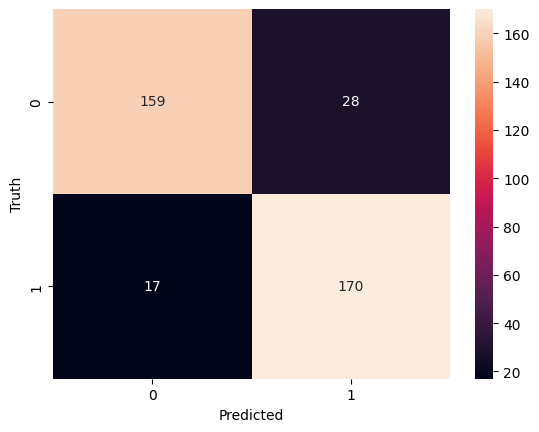

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       187
           1       0.86      0.91      0.88       187

    accuracy                           0.88       374
   macro avg       0.88      0.88      0.88       374
weighted avg       0.88      0.88      0.88       374



In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 5s 5s/step


array([[0.7293564 ],
       [0.8414403 ],
       [0.79897904],
       [0.16138038],
       [0.10596151]], dtype=float32)

In [ ]:
text = "Hi how are you?"

In [ ]:
ans = model.predict([text])

1/1 [==============================] - 2s 2s/step


In [ ]:
ans = model.predict([input("Enter the gmail: ")])
print(ans)
if ans[0][0]< 0.6:
  print("This is Good")
else:
  print("$$$$$$$$$$$ SPAM  $$$$$$$$$")

Enter the gmail: Thanks for applying to Google! There are a ton of great companies out there, so we appreciate your interest in joining our team.  While we’re not able to reach out to every applicant, our recruiting team will contact you if your skills and experience are a strong match for the role. In the meantime, join the conversation about job opportunities
1/1 [==============================] - 1s 565ms/step
[[0.61140007]]
$$$$$$$$$$$ SPAM  $$$$$$$$$


In [ ]:
model.load_weights('path_to_saved_model_weights.h5')

FileNotFoundError: ignored

In [ ]:
import datetime

In [ ]:
current_date = datetime.datetime.utcnow().date()
two_days_after = current_date + datetime.timedelta(days = 2)

In [ ]:
print(two_days_after, str(two_days_after))

2023-06-03 2023-06-03


In [ ]:
pdd = "2023-06-03"
spdd = "2023-06-04"

In [ ]:
if spdd > pdd:
  print("PDD will be considered")
  if spdd <= str(two_days_after):
    print("PDD is withn 2 days")

PDD will be considered


In [ ]:
num = int(input("Enter the num:"))
if num > 50:
  print("More than 50")
  if num > 100:
    print("More than 100")
else:
  print("Nooooooooo")

Enter the num:55
More than 50
